In [1]:
import pandas as pd
df= pd.read_csv("NEW_Keywords_time.csv")
df

,index,selftext,num_comments,score,title,type
0,218,A small hole in the side or bottom of the can ...,5,1,Drill holes in your trashcans,Adult
1,62,James brought up the fantasy that he had read ...,2,1,It just happened,Adult
2,329,I have no idea what bills typically cost or th...,4,5,Trying to move out.,Adult
3,359,Or may it’s just co-incidence that I’m noticin...,0,2,Slowly trying to be an adult..,Adult
4,393,I guess he wanted to get revenge or something ...,4,1,"Not a lot of work experience, wondering how to...",Adult
...,...,...,...,...,...,...
1315,5859,Woke up way earlier than usual today.,11,8,Good Morning to Everyone!,Adult
1316,5933,But come to find out he had drove 25 minutes t...,17,1,College freshman wondering if my parents are b...,Adult
1317,5935,"Long story short, I applied to do a master's d...",1,1,My mom wants me to go to grad school. I don't ...,Adult
1318,5964,It could have the exact same features as the p...,11,1,All penises are beautiful!!! However...,Adult


In [2]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [3]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [4]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0       A small hole in the side or bottom of the can ...
1       James brought up the fantasy that he had read ...
2       I have no idea what bill typically cost or the...
3       Or may it just co-incidence that Im noticing p...
4       I guess he wanted to get revenge or something ...
                              ...                        
1315                Woke up way earlier than usual today.
1316    But come to find out he had drove 25 minute to...
1317    Long story short, I applied to do a master's d...
1318    It could have the exact same feature a the pic...
1319    Walk back down the trail you came on your dog ...
Name: selftext, Length: 1320, dtype: object

In [5]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,A small hole in the side or bottom of the can ...
1,1,James brought up the fantasy that he had read ...
2,2,I have no idea what bill typically cost or the...
3,3,Or may it just co-incidence that Im noticing p...
4,4,I guess he wanted to get revenge or something ...
...,...,...
1315,1315,Woke up way earlier than usual today.
1316,1316,But come to find out he had drove 25 minute to...
1317,1317,"Long story short, I applied to do a master's d..."
1318,1318,It could have the exact same feature a the pic...


In [6]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,10,15,19,20,2020,2021,30,401k,able,...,went,wish,work,working,worried,x200b,year,year ago,year earlier,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.248218,0.0,0.0,0.0
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [11]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=3, random_state=0)

In [12]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [14]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10)})
topic1

,Topic 0,Topic 1,Topic 2
0,tax,like im,really
1,month,retirement,day
2,money,age,dont time
3,started,just,people
4,company,far,just
5,got,life,work
6,wa,im,know
7,earlier year,feel like,wa
8,year,feel,dont
9,earlier,like,time


Topic 0: tax/money/company \
Topic 1: retirement age/feel life \
Topic 2: dont have time/peole just work

In [15]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]

## Compare Emotion across topics

In [16]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [17]:
a=sent_df(t0)
a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
final=pd.concat([a,b,c],axis=0)
final.total.describe()

count    1320.000000
mean        0.037098
std         0.189573
min        -1.197802
25%        -0.023370
50%         0.000000
75%         0.115880
max         1.865330
Name: total, dtype: float64

In [22]:
a.total.describe()

count    622.000000
mean       0.035259
std        0.180575
min       -1.197802
25%       -0.003817
50%        0.000000
75%        0.115634
max        0.949318
Name: total, dtype: float64

[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

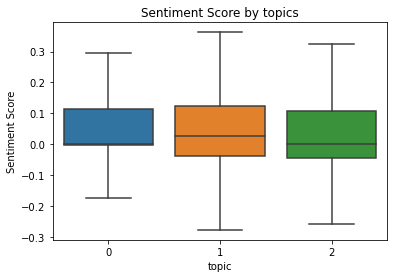

In [21]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Most common positive/negative words

In [23]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [24]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [25]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,124
1,ha,70
2,want,47
3,good,41
4,credit,31
0,no,35
1,pay,32
2,debt,24
3,leave,18
4,bad,10


In [26]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,ha,40
1,better,18
2,want,17
3,like,17
4,credit,16
0,no,19
1,pay,19
2,debt,11
3,leave,6
4,anxiety,5


In [27]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,100
1,want,17
2,ha,15
3,good,11
4,best,10
0,no,10
1,pay,7
2,worried,7
3,debt,7
4,like,6


In [28]:
positive,negative=sort_pn(c)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,good,17
1,ha,15
2,want,13
3,sure,11
4,credit,11
0,leave,8
1,pay,6
2,want,6
3,no,6
4,debt,6


## Word Frequency splitted by sentiment

In [30]:
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go','time','need','want'
                  })
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

In [31]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [33]:
final.total.describe()

count    1320.000000
mean        0.037098
std         0.189573
min        -1.197802
25%        -0.023370
50%         0.000000
75%         0.115880
max         1.865330
Name: total, dtype: float64

In [34]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.115880]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.023370]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(           words  count
 0         I feel     63
 1           I wa     34
 2   earlier year     26
 3         feel I     17
 4  earlier year,     14
 5        I think     14
 6    credit card     13
 7   I understand     13
 8      make sure     12
 9     far behind     12,
           words  count
 0          I wa     31
 1  earlier year     19
 2        I feel     19
 3     I started     11
 4        year I      9
 5      behind I      9
 6       I think      8
 7   fall behind      8
 8     earlier I      7
 9           I I      6)

In [35]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(           words  count
 0   earlier year     23
 1           I wa     17
 2  earlier year,     14
 3   year earlier     10
 4    credit card     10
 5  earlier year.      9
 6       Roth IRA      9
 7        I think      8
 8     earlier, I      7
 9       two year      7,
            words  count
 0   earlier year     19
 1           I wa     18
 2      I started     11
 3         year I      9
 4  earlier year,      6
 5       year ago      6
 6      earlier I      5
 7       I bought      5
 8   loan earlier      5
 9        I never      4)

In [36]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(          words  count
 0        I feel     62
 1        feel I     15
 2    far behind     11
 3   feel behind     10
 4      feel I'm      9
 5  I understand      8
 6       feel Im      7
 7      behind I      7
 8     Im behind      6
 9   year behind      5,
               words  count
 0            I feel     18
 1              I wa      7
 2          behind I      6
 3        far behind      5
 4        I'm behind      4
 5    leaving behind      4
 6  reasoning behind      4
 7      I understand      4
 8           I think      3
 9            I plan      3)

In [37]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(           words  count
 0           I wa     13
 1  people behind      5
 2        I didnt      5
 3  reason behind      5
 4      make sure      5
 5         I cant      5
 6    math behind      5
 7    best friend      4
 8         year I      4
 9       behind I      4,
          words  count
 0         I wa      6
 1        But I      4
 2      I still      4
 3      I leave      4
 4       I fall      4
 5  fall behind      4
 6        I see      3
 7     behind I      3
 8  behind back      3
 9     Ive seen      3)

## Topic Modeling after sentiment splitting

In [39]:
final.total.describe()

count    1320.000000
mean        0.037098
std         0.189573
min        -1.197802
25%        -0.023370
50%         0.000000
75%         0.115880
max         1.865330
Name: total, dtype: float64

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']>0.115880]) #positive
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,10,100,15,19,20,2020,2021,25,30,...,work,working,world,worth,x200b,year,year ago,year earlier,year old,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.275187,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.218485,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.454887,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [42]:
from sklearn.decomposition import NMF

model1=NMF(n_components=4,init="random",random_state=1)
model1.fit(count_df1)

NMF(init='random', n_components=4, random_state=1)

In [43]:
topic2=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),
                   'Topic 3':top_words(count_df1, model1, 3, 10)})
topic2
# 'Topic 4':top_words(count_df1, model1, 4, 10),
#                     'Topic 5':top_words(count_df1, model1, 5, 10)

,Topic 0,Topic 1,Topic 2,Topic 3
0,gain,late,people,going
1,000,considering,better,month
2,roth,left,covid,sure
3,stock,people,told,credit
4,year earlier,help,stock,job
5,wish,im,run,earlier
6,tax,far,company,work
7,earlier year,age,market,make
8,earlier,life,left,money
9,year,feel,ha,wa


pay house/loan/car \
retirement \
credit card \
school friend feel

In [44]:
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']<-0.023370]) #negative
counts=counts.toarray()
count_df2=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df2

,000,10,1000,12,18,19,20,2020,30,401k,...,working,worried,worth,wouldnt,wrong,x200b,year,year ago,year earlier,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.635503,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.361371,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [45]:
model2=NMF(n_components=4,init="random",random_state=0)
model2.fit(count_df2)

NMF(init='random', n_components=4, random_state=0)

In [46]:
topic3=pd.DataFrame({'Topic 0':top_words(count_df2, model2, 0, 10),
                   'Topic 1':top_words(count_df2, model2, 1, 10),
                   'Topic 2':top_words(count_df2, model2, 2, 10),
                   'Topic 3':top_words(count_df2, model2, 3, 10)})
topic3

,Topic 0,Topic 1,Topic 2,Topic 3
0,month,make,started,help
1,phone,fall,job earlier,bad
2,lot,way,loan,thought
3,said,saving,work,leave
4,started,getting,debt,little
5,wall,work,job,far
6,insurance,retirement,pay,debt
7,company,car,earlier year,financial
8,told,money,earlier,life
9,wa,im,year,feel


live home/parent \
credit card and insurance \
retirement \
parent talking

## Find all adj. related to parent

In [49]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
sentence=df['selftext'].apply(lambda x: sent_tokenize(x))

In [53]:
def extract_parent(sentence_ele):
    L=[]
    for i in sentence_ele:
        if 'time' in i: 
            L.append(i)
    return L

In [54]:
parent_sentence=sentence.apply(lambda x: extract_parent(x))
' '.join(parent_sentence[0])

''

In [55]:
parent_sentence[0]

[]

In [58]:
import nltk
tokens=nltk.word_tokenize(parent_sentence[39][1])
print(tokens)

IndexError: list index out of range

In [59]:
nltk.pos_tag(tokens)

NameError: name 'tokens' is not defined

In [60]:
#nltk.download('averaged_perceptron_tagger')
def extract_adj(sentence_ele):
    adjs=[]
    for i in sentence_ele:
        tokens=nltk.word_tokenize(i)
        df_type=pd.DataFrame(nltk.pos_tag(tokens),columns=['words', 'type'])
        adjs=list(df_type[df_type.type=='JJ'].words)
    return ' '.join(adjs)

In [61]:
adjs=parent_sentence.apply(lambda x: extract_adj(x))

In [62]:
adjs

0        
1        
2        
3        
4        
       ..
1315     
1316     
1317     
1318     
1319     
Name: selftext, Length: 1320, dtype: object

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_df=0.5,min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(adjs)
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [530]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)

NMF(init='random', n_components=3, random_state=0)

In [531]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10)})
topic1

,Topic 0,Topic 1,Topic 2
0,small,hard,great
1,current,great,current
2,great,current,hard
3,free,possible,free
4,high,monthly,financial
5,sure,long,long
6,little,financial,live
7,financial,little,little
8,able,sure,monthly
9,good,new,old


In [447]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(adjs).head(20)

,words,count
0,’,347
1,own,188
2,good,155
3,other,154
4,new,143
5,able,138
6,old,137
7,much,126
8,few,126
9,m,122


In [464]:
stop_words.update({'i','*','im','’','much'})
adjs=adjs.apply(lambda x: remove_stopwords(x))
count_df=count_words(adjs)
count_df.head(10)

,words,count
0,good,155
1,new,143
2,able,138
3,old,137
4,first,122
5,financial,119
6,last,103
7,due,103
8,sure,96
9,next,93
